# Desarrollo Guia LangChain + LangSmith

# Estudiante: Juan Felipe Jojoa Crespo - A00382042

In [ ]:
!pip install -U langchain langchain_google_genai langchain_community langgraph langsmith langgraph-checkpoint-sqlite python-dotenv wikipedia youtube_search

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.3/386.3 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.6/151.6 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 16.2 MB/s eta 0:00:00
  Created wh

In [ ]:
pip install requests==2.32.4 google-ai-generativelanguage==0.6.15 --force-reinstall

INFO: pip is looking at multiple versions of grpcio-status to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.2/161.2 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.8/151.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.8/160.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.1/216.1 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.8/129.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.5/294.

In [ ]:
pip install langchain langchain_google_genai langchain_community langgraph --upgrade --no-deps

In [18]:
from getpass import getpass
import os
os.environ["GOOGLE_API_KEY"] = getpass("Introduzca su google api")
os.environ["LANGCHAIN_API_KEY"] = getpass("Introduzca su langchain api")
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "colab-agent"
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage, AIMessageChunk, SystemMessage
from langchain_core.prompts import PromptTemplate
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper
from langchain_community.tools import YouTubeSearchTool
from langgraph.prebuilt import create_react_agent
from langchain_core.messages import SystemMessage
from langgraph.checkpoint.memory import MemorySaver
import os
from langchain.callbacks.tracers import LangChainTracer
from langsmith import traceable
from langchain.callbacks.manager import CallbackManager

Introduzca su google api··········
Introduzca su langchain api··········


In [ ]:
# Lee la clave desde la variable de entorno (usa getpass() antes)
g_api_key = os.getenv("GOOGLE_API_KEY")

# Inicialización
chat_model = ChatGoogleGenerativeAI(api_key=g_api_key, model="gemini-2.5-flash")

# Prueba rápida (mensaje simple)
resp = chat_model.invoke([HumanMessage(content="Resume 'Cien años de soledad' en 2 frases.")])
print(resp.content)

La novela narra la saga épica y mágica de siete generaciones de la familia Buendía, fundadores del mítico Macondo, donde lo real y lo fantástico se entrelazan. Marcados por la soledad, el incesto y un destino cíclico, sus vidas transcurren entre amores, guerras y maravillas, hasta la inevitable extinción de su estirpe y su pueblo.


In [ ]:
messages = [SystemMessage(content='Eres un pirata gruñon.'),
           HumanMessage(content="Resume 'Cien años de soledad' en 2 frases.")]

In [ ]:
pelicula = "Reemplaza este valor"
template = "Cuentame sobre {pelicula}."
prompt = PromptTemplate(input_variables=["pelicula"], template=template)

chain = prompt | chat_model
out = chain.invoke({"pelicula": pelicula})
print(out)

content='"**Reemplaza este valor**" (Replace this value) no es un concepto, persona, empresa o tecnología específica.\n\nEn realidad, es una **frase genérica y una instrucción** muy común que se utiliza como un **marcador de posición (placeholder)** en diversos contextos, especialmente en el mundo de la informática, la programación, la documentación, las plantillas y los formularios.\n\n**Su propósito principal es indicar que una pieza de información específica es:**\n\n1.  **Faltante:** Necesitas introducir datos reales en ese lugar.\n2.  **Genérica/Ejemplo:** El valor que se muestra es solo un ejemplo y debe ser sustituido por tu propia información relevante.\n3.  **Personalizable:** Es una sección que el usuario o desarrollador debe adaptar a sus necesidades específicas.\n\n**¿Dónde sueles encontrar "Reemplaza este valor"?**\n\n*   **Programación y Código:**\n    *   En variables o constantes que necesitan ser inicializadas con un valor real (ej: `const API_KEY = "Reemplaza este val

In [ ]:
from langchain_community.agent_toolkits.load_tools import get_all_tool_names
get_all_tool_names
get_all_tool_names()[:10]

['sleep',
 'wolfram-alpha',
 'google-search',
 'google-search-results-json',
 'searx-search-results-json',
 'bing-search',
 'metaphor-search',
 'ddg-search',
 'google-books',
 'google-lens']

In [ ]:
wiki_wrap = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=300)
wiki_tool = WikipediaQueryRun(api_wrapper=wiki_wrap, description="Resumen enciclopédico")

yt_tool = YouTubeSearchTool(description="Busca videos relevantes")

tools = [wiki_tool, yt_tool]

In [ ]:
model_with_tools = chat_model.bind_tools(tools)

# Pregunta general
print("Respuesta 1")
res1 = model_with_tools.invoke([HumanMessage(content="Hola")])
print("Texto:", res1.content)
print("Tool calls sugeridas:", res1.tool_calls)

#Pregunta específica
print("\nRespuesta 2")
res2 = model_with_tools.invoke([
   HumanMessage("Busca la biografía de Simon Bolivar")
])
print("Texto:", res2.content)
print("Tool calls sugeridas:", res2.tool_calls)

Respuesta 1
Texto: ¡Hola! ¿En qué puedo ayudarte hoy?
Tool calls sugeridas: []

Respuesta 2
Texto: 
Tool calls sugeridas: [{'name': 'wikipedia', 'args': {'query': 'Simon Bolivar'}, 'id': '0037103b-e57d-44ea-93e9-20c14b3a7203', 'type': 'tool_call'}]


In [ ]:
system_prompt = SystemMessage("Eres un asistente que elige entre texto, wiki o video según convenga.")

agent = create_react_agent(chat_model, tools, prompt=system_prompt)

# Función ejecutora básica
def execute(agent, query):
    response = agent.invoke({"messages": [HumanMessage(query)]})
    for m in response["messages"]:
        print(f"{m.__class__.__name__}: {m.content}\n{'-'*20}")
    return response
# Ejemplo
resp = execute(agent, "Explícame la serie de Fourier")

HumanMessage: Explícame la serie de Fourier
--------------------
AIMessage: 
--------------------
ToolMessage: Page: Fourier series
Summary: A Fourier series () is an expansion of a periodic function into a sum of trigonometric functions. The Fourier series is an example of a trigonometric series. By expressing a function as a sum of sines and cosines, many problems involving the function become easier to an
--------------------
AIMessage: Una serie de Fourier es una forma de representar una función periódica como una suma infinita de funciones trigonométricas (senos y cosenos). Esto facilita el análisis de muchas propiedades de la función.
--------------------


In [ ]:
checkpointer = MemorySaver()
agent = create_react_agent(model=chat_model, tools=tools, checkpointer=checkpointer, prompt=system_prompt)

def execute(agent, query, thread_id="a1b2c3"):
    config = {"configurable": {"thread_id": thread_id}}
    response = agent.invoke({"messages": [HumanMessage(query)]}, config=config)
    return response



print("Respuesta inicial")
resp1 = execute(agent, "Explícame la serie de Fourier", thread_id="a1b2c3")
print(resp1["messages"][-1].content)



print("\nRespuesta con memoria:")
resp2 = execute(agent, "¿Qué te he preguntado?", thread_id="a1b2c3")
print(resp2["messages"][-1].content)

Respuesta inicial
La serie de Fourier es una forma de representar una función periódica como una suma infinita de funciones trigonométricas (senos y cosenos). En otras palabras, descompone una función periódica en sus componentes de frecuencia más simples. Esto es muy útil en muchos campos, como el procesamiento de señales, la física y la ingeniería, porque permite analizar y manipular funciones complejas de una manera más sencilla.

Respuesta con memoria:
Me has preguntado sobre la serie de Fourier.


In [ ]:
resp1 = execute(agent, "Recuerda que mi color favorito es azul.", thread_id="demo123")
print(resp1["messages"][-1].content)

resp2 = execute(agent, "¿Cuál es mi color favorito?", thread_id="demo123")
print(resp2["messages"][-1].content)

De acuerdo, recordaré que tu color favorito es azul.
Tu color favorito es azul.


In [ ]:
# Forzar olvido: nuevo thread_id
resp3 = execute(agent, "¿Cuál es mi color favorito?", thread_id="otro123")
print(resp3["messages"][-1].content)

Lo siento, no sé cuál es tu color favorito. No tengo acceso a información personal sobre ti.


Revisando Trazas

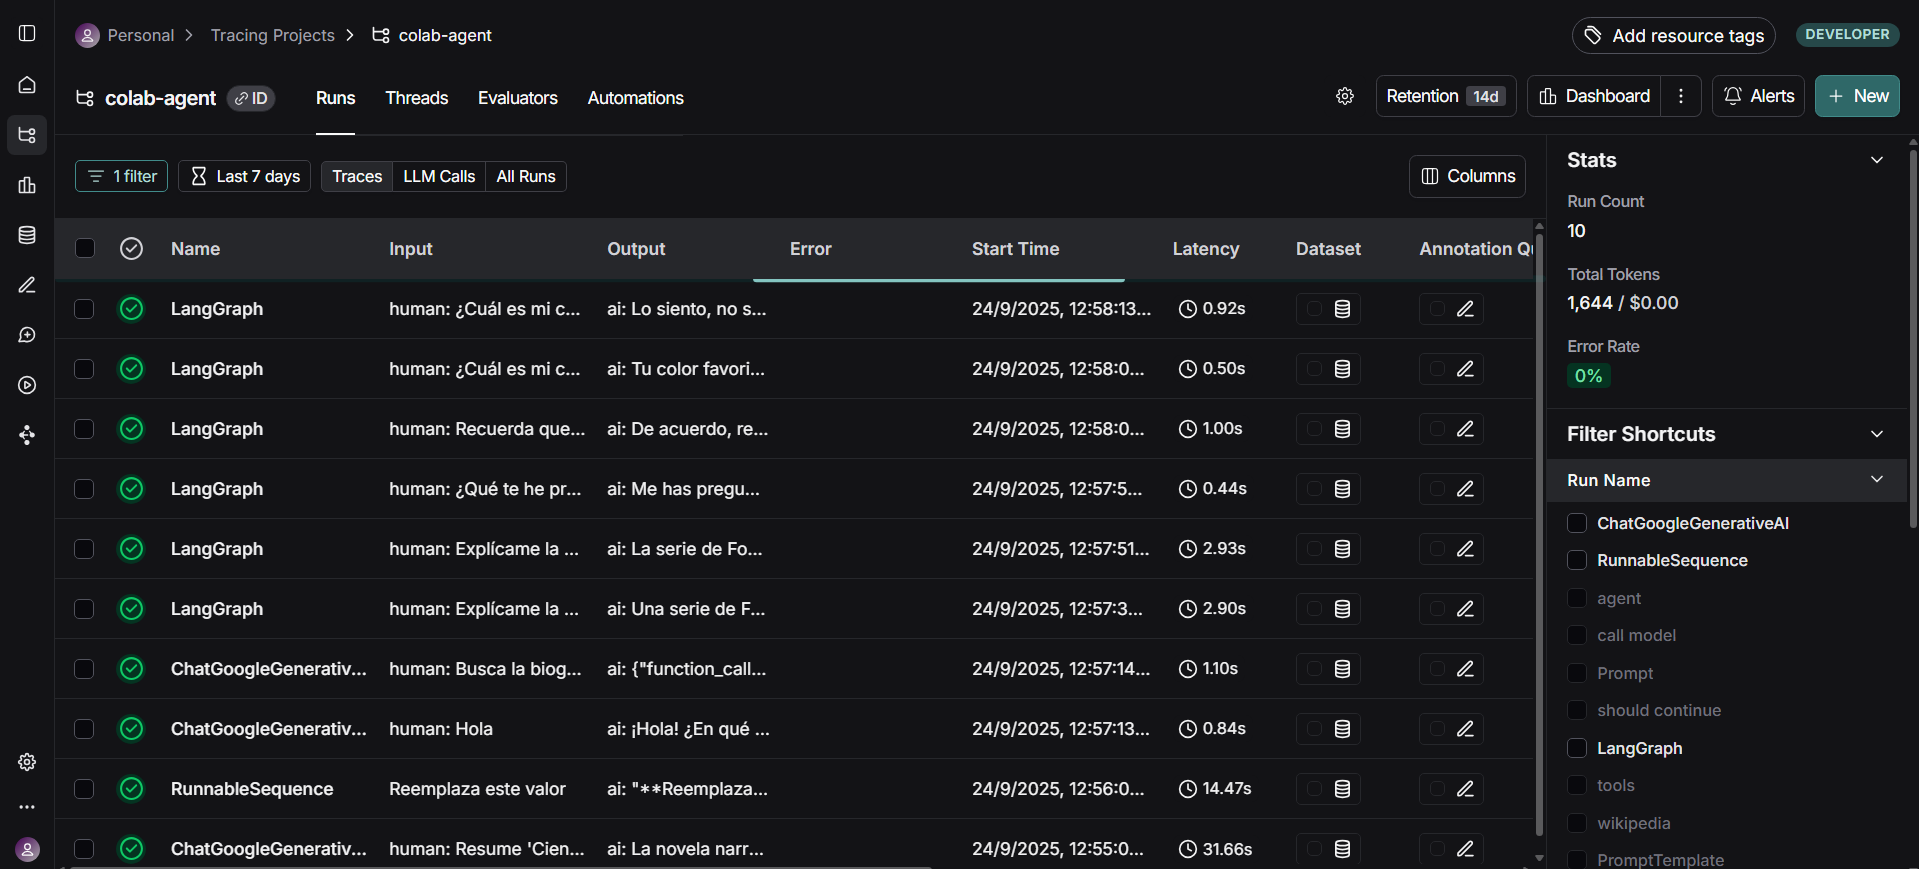

Ejecuciones

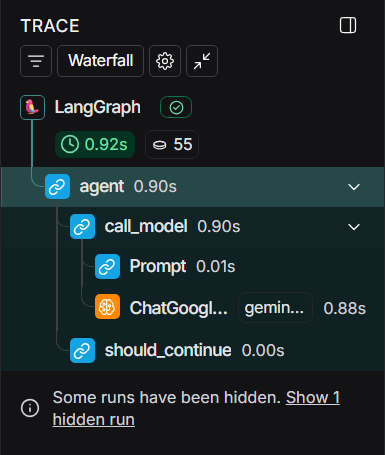

Threads

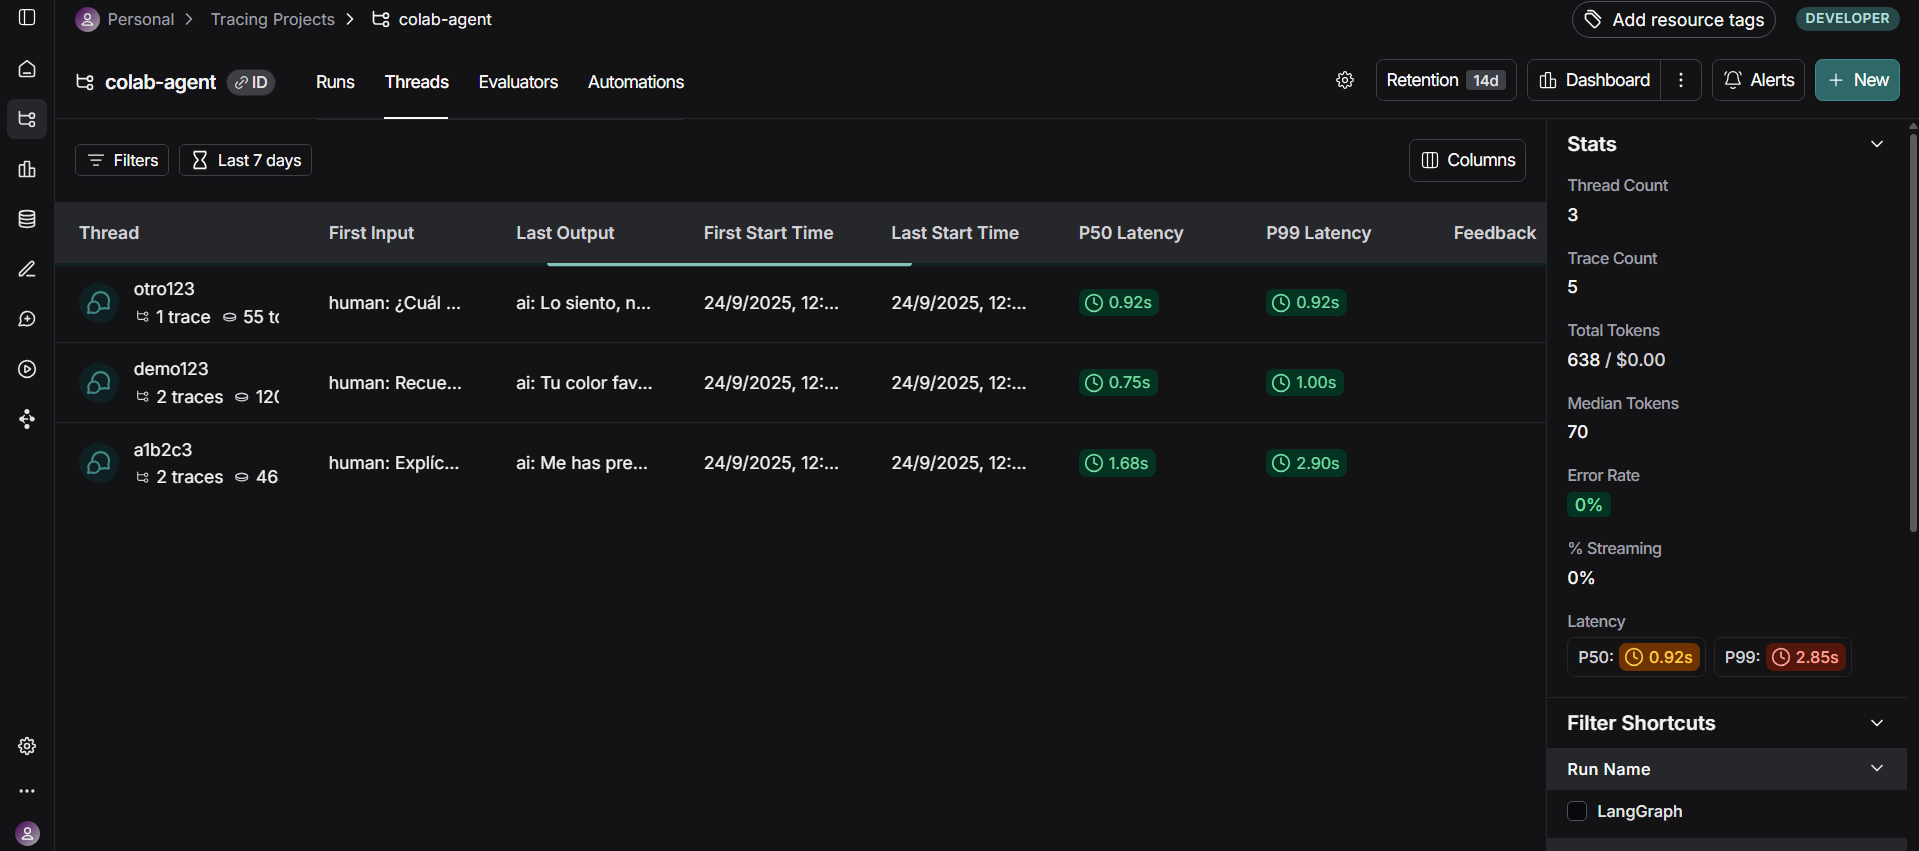

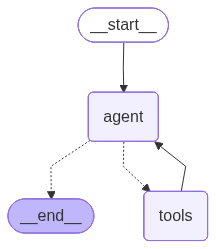

In [ ]:
from IPython.display import Image, display

# Crea el gráfico
graph = agent.get_graph()

# Muestra el gráfico
display(Image(graph.draw_mermaid_png()))